In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Customers.csv', encoding='ISO-8859-1')

In [3]:
df.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [4]:
df

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [5]:
df['State Code'].fillna(df['State Code'].mode()[0],inplace=True)

C:\Users\rs\AppData\Local\Temp\ipykernel_14736\426478074.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['State Code'].fillna(df['State Code'].mode()[0],inplace=True)


In [6]:
df.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

In [7]:
df.to_csv('Customers_Clean.csv', index=False)

In [8]:
df=pd.read_csv('Exchange_Rates.csv', encoding='ISO-8859-1')

In [9]:
df.isnull().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

In [10]:
df.to_csv('Exchange_Rates_Clean.csv', index=False)

In [11]:
df=pd.read_csv('Products.csv', encoding='ISO-8859-1')

In [12]:
df.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [13]:
df.to_csv('Products_Clean.csv', index=False)

In [14]:
df=pd.read_csv('Sales.csv', encoding='ISO-8859-1')

In [15]:
df.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [16]:
df

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [17]:
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None).interpolate(), unit='s')

In [18]:
df.isnull().sum()

Order Number     0
Line Item        0
Order Date       0
Delivery Date    1
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64

In [19]:
df['Delivery Date'].iloc[0] = df['Delivery Date'].bfill().iloc[0] 

C:\Users\rs\AppData\Local\Temp\ipykernel_14736\3061415542.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Delivery Date'].iloc[0] = df['Delivery Date'].bfill().iloc[0]
C:\Users\rs\AppData\Local\Temp\ipykernel_14736\3061415542.py:1: S

In [20]:
df.isnull().sum()

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64

In [21]:
df.to_csv('Sales_Clean.csv',index=False)

In [22]:
df=pd.read_csv('Stores.csv', encoding='ISO-8859-1')

In [23]:
df.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [24]:
df

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


{'whiskers': [<matplotlib.lines.Line2D at 0x2470cce1b20>,
 'caps': [<matplotlib.lines.Line2D at 0x2470cce3890>,
 'boxes': [<matplotlib.lines.Line2D at 0x2470ccbb6e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2470cce3e60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2470cd141a0>],
 'means': []}

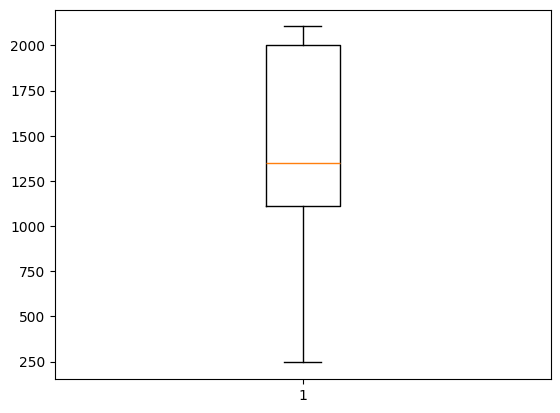

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Stores.csv', encoding='ISO-8859-1')
df1=df['Square Meters'].dropna()

plt.boxplot(df1)

In [26]:
df['Square Meters'].fillna(df['Square Meters'].mean(),inplace=True)

C:\Users\rs\AppData\Local\Temp\ipykernel_14736\671420480.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Square Meters'].fillna(df['Square Meters'].mean(),inplace=True)


In [27]:
df.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
dtype: int64

In [28]:
df.to_csv('Stores_Clean.csv',index=False)

In [29]:
df1=pd.read_csv('Sales_Clean.csv')

In [30]:
df2=pd.read_csv('Products_Clean.csv')

In [31]:
df3=pd.read_csv('Customers_Clean.csv')

In [32]:
merged_df = pd.merge(df1, df2, on='ProductKey', how='outer')

In [33]:
merged_df = pd.merge(merged_df, df3, on='CustomerKey', how='outer')

In [34]:
merged_df.to_csv('mergerd.csv',index=False)